Q11)  Suppose we want to estimate the average weight of an adult male in    Mexico. We draw a random sample of 2,000 men from a population of 3,000,000 men and weigh them. We find that the average person in our sample weighs 200 pounds, and the standard deviation of the sample is 30 pounds. Calculate 94%,98%,96% confidence interval?

In [1]:
import math

In [2]:
(200+(1.555*(2000/math.sqrt(30))))

767.8057179470222

In [3]:
(200-(1.555*(2000/math.sqrt(30))))

-367.80571794702223

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

In [63]:
df1=pd.read_csv('delivery_time.csv')
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

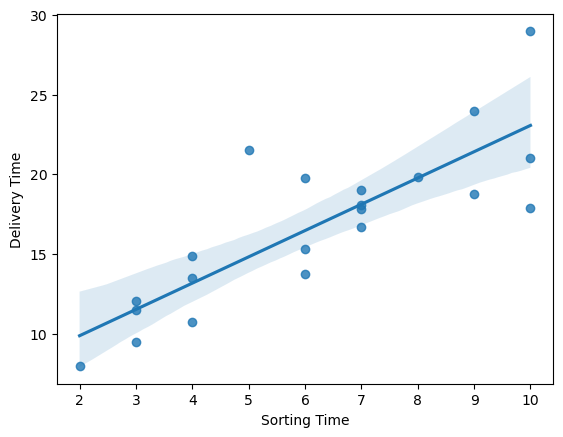

In [64]:
import seaborn as sns
sns.regplot(x=df1['Sorting Time'],y=df1['Delivery Time'])  


In [6]:
df1=df1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
feature=df1[['sorting_time']]

In [8]:
feature

,sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [9]:
target=df1.drop('sorting_time',axis=1)
target

,delivery_time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [10]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=20)

In [11]:
x_train

,sorting_time
13,3
17,7
14,3
20,5
10,8
5,6
8,10
6,7
0,10
2,6


In [12]:
x_test

,sorting_time
16,6
19,7
18,2
4,10
1,4
12,7


In [13]:
y_train

,delivery_time
13,11.50
17,18.11
14,12.03
20,21.50
10,19.83
5,15.35
8,17.90
6,19.00
0,21.00
2,19.75


In [14]:
y_test

,delivery_time
16,13.75
19,17.83
18,8.00
4,29.00
1,13.50
12,16.68


In [15]:
lin_model=LinearRegression()

In [16]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=lin_model.predict(x_test)

In [18]:
y_pred

array([[16.56826979],
       [17.89975806],
       [11.24231672],
       [21.89422287],
       [13.90529326],
       [17.89975806]])

In [19]:
lin_model.coef_

array([[1.33148827]])

In [20]:
lin_model.intercept_

array([8.57934018])

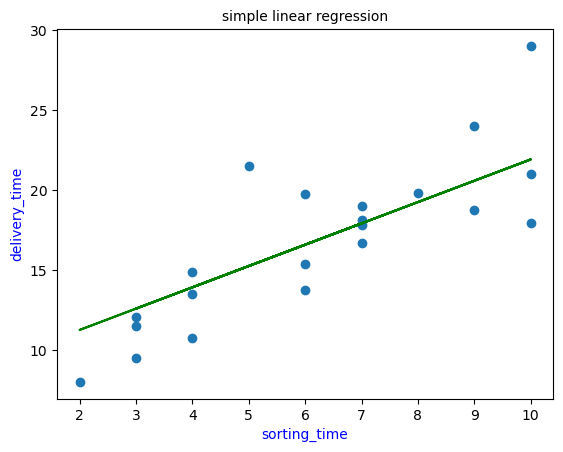

In [21]:
plt.scatter(df1.sorting_time, df1.delivery_time)
plt.xlabel('sorting_time',color='blue',size=10)
plt.ylabel('delivery_time',color='blue',size=10)
plt.title('simple linear regression',color='black',size=10)
plt.plot(df1.sorting_time,lin_model.predict(df1[['sorting_time']]),color='green')

In [23]:
import statsmodels.formula.api as sms
model= sms.ols(formula='sorting_time~delivery_time',data=df1).fit()

In [24]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [25]:
model.rsquared

0.6822714748417231

In [26]:
model.rsquared_adj

0.6655489208860244

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        11:26:51   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model1 = sms.ols('np.sqrt(sorting_time)~np.sqrt(delivery_time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(sorting_time)   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     51.16
Date:                   Sun, 10 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                           11:26:57   Log-Likelihood:                -2.3695
No. Observations:                     21   AIC:                             8.739
Df Residuals:                         19   BIC:                             10.83
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.5151      0.417     -1.236      0.232      -1.388       0.357
np.sqrt(delivery_time)     0.7276      0.102      7.153      0.000       0.515       0.940
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.001
Skew:                          -0.005   Prob(JB):                         1.00
Kurtosis:                       3.029   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model2 = sms.ols('np.cbrt(sorting_time)~np.cbrt(delivery_time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.cbrt(sorting_time)   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     55.25
Date:                   Sun, 10 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                           11:27:04   Log-Likelihood:                 12.617
No. Observations:                     21   AIC:                            -21.23
Df Residuals:                         19   BIC:                            -19.14
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4315      0.302     -1.431      0.169      -1.063       0.200
np.cbrt(delivery_time)     0.8800      0.118      7.433      0.000       0.632       1.128
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.031
Skew:                          -0.078   Prob(JB):                        0.985
Kurtosis:                       2.894   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model3 = sms.ols('np.log(sorting_time)~np.log(delivery_time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Sun, 10 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                          11:27:10   Log-Likelihood:                 2.1913
No. Observations:                    21   AIC:                           -0.3826
Df Residuals:                        19   BIC:                             1.706
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(delivery_time)     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
model1_pred_y =np.square(model1.predict(df1['delivery_time']))
model2_pred_y =pow(model2.predict(df1['delivery_time']),3)
model3_pred_y =np.exp(model3.predict(df1['delivery_time']))

In [34]:
model1_rmse =np.sqrt(mean_squared_error(df1['sorting_time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['sorting_time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['sorting_time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid))
print('model1=', model1_rmse)
print('model2=', model2_rmse)
print('model3=', model3_rmse)

model= 1.470098983317377
model1= 1.4194810822762183
model2= 1.4325594993630764
model3= 1.4699626105125372


In [35]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model1'

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

In [37]:
data=pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
target=data[['Salary']]

In [39]:
target

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [40]:
feature=data.drop('Salary',axis=1)
feature

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [41]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=100)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 1)
(8, 1)
(22, 1)
(8, 1)


In [43]:
lin_model1=LinearRegression()

In [44]:
lin_model1.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=lin_model1.predict(x_test)

In [46]:
y_pred

array([[ 61553.5935156 ],
       [117565.50786941],
       [125291.28915959],
       [ 65416.48416069],
       [ 53827.81222542],
       [ 64450.76149941],
       [118531.23053068],
       [112736.89456304]])

In [47]:
lin_model1.coef_

array([[9657.22661273]])

In [48]:
lin_model1.intercept_

array([25821.85504851])

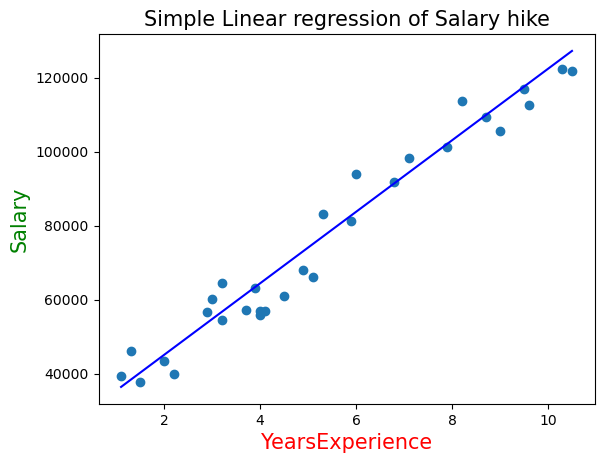

In [49]:
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel('YearsExperience',color='red',size=15)
plt.ylabel('Salary',color='green',size=15)
plt.title('Simple Linear regression of Salary hike',color='black',size=15)
plt.plot(data.YearsExperience, lin_model1.predict(data[['YearsExperience']]),color='blue')

In [50]:
model=sms.ols(formula='YearsExperience~Salary',data=data).fit()

In [51]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        11:27:49   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model1=sms.ols('np.sqrt(YearsExperience)~np.sqrt(Salary)',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(YearsExperience)   R-squared:                       0.942
Model:                                  OLS   Adj. R-squared:                  0.940
Method:                       Least Squares   F-statistic:                     454.3
Date:                      Sun, 10 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                              11:27:53   Log-Likelihood:                 14.149
No. Observations:                        30   AIC:                            -24.30
Df Residuals:                            28   BIC:                            -21.49
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1612      0.161     -7.208      0.000      -1.491      -0.831
np.sqrt(Salary)     0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model2=sms.ols('np.cbrt(YearsExperience)~np.cbrt(Salary)',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.cbrt(YearsExperience)   R-squared:                       0.932
Model:                                  OLS   Adj. R-squared:                  0.930
Method:                       Least Squares   F-statistic:                     386.5
Date:                      Sun, 10 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                              11:27:56   Log-Likelihood:                 31.493
No. Observations:                        30   AIC:                            -58.99
Df Residuals:                            28   BIC:                            -56.18
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9290      0.134     -6.937      0.000      -1.203      -0.655
np.cbrt(Salary)     0.0626      0.003     19.659      0.000       0.056       0.069
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.612
Skew:                          -0.564   Prob(JB):                        0.447
Kurtosis:                       3.124   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model3=sms.ols('np.log(YearsExperience)~np.log(Salary)',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.905
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     267.4
Date:                     Sun, 10 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                             11:27:59   Log-Likelihood:                 7.4195
No. Observations:                       30   AIC:                            -10.84
Df Residuals:                           28   BIC:                            -8.037
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(Salary)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model1_pred_y =np.square(model1.predict(data['Salary']))
model2_pred_y =pow(model2.predict(data['Salary']),3)
model3_pred_y =np.exp(model3.predict(data['Salary']))

In [58]:
model1_rmse =np.sqrt(mean_squared_error(data['YearsExperience'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(data['YearsExperience'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(data['YearsExperience'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid))
print('model1=', model1_rmse)
print('model2=', model2_rmse)
print('model3=', model3_rmse)

model= 0.5991950540452539
model1= 0.5832153569122783
model2= 0.5912959035338441
model3= 0.637775537821841


In [59]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model1'